**Machine Learning Approach**

=== Original Clinical Note ===
A 35-year-old male presents with heartburn, regurgitation, and a sour taste in his mouth, especially after meals. The patient has been self-medicating with over-the-counter antacids, but the symptoms persist. A 24-hour pH monitoring test confirms the diagnosis of GERD. The patient is started on a PPI and advised to avoid trigger foods.

=== After Stopword Removal & Cleaning ===
35yearold male heartburn regurgitation sour taste mouth meals patient selfmedicating overthecounter antacids symptoms persist 24hour monitoring confirms diagnosis gerd patient started ppi advised avoid trigger foods
Training Random Forest...

Random Forest Accuracy: 0.9460
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.88      0.96      0.92        47
                  Acute Renal Failure       0.98      0.92      0.95        61
                               Asthma       0.89      0.92      0.90        

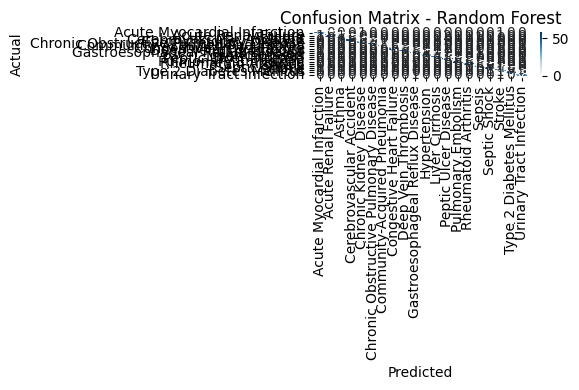

Training Logistic Regression...

Logistic Regression Accuracy: 0.9460
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.88      0.96      0.92        47
                  Acute Renal Failure       0.98      0.92      0.95        61
                               Asthma       0.89      0.92      0.90        51
             Cerebrovascular Accident       0.98      0.96      0.97        54
               Chronic Kidney Disease       0.97      0.97      0.97        40
Chronic Obstructive Pulmonary Disease       0.96      0.96      0.96        51
         Community-Acquired Pneumonia       0.92      0.96      0.94        46
             Congestive Heart Failure       0.96      0.95      0.96        57
                 Deep Vein Thrombosis       0.98      0.96      0.97        51
      Gastroesophageal Reflux Disease       0.96      0.91      0.93        53
                         Hypertension       0.93      0.90  

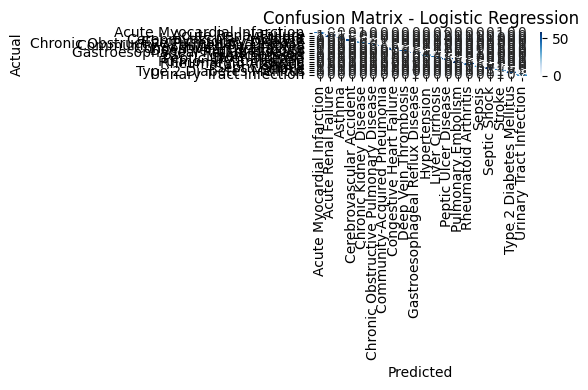

Training Naive Bayes...

Naive Bayes Accuracy: 0.9460
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.88      0.96      0.92        47
                  Acute Renal Failure       0.98      0.92      0.95        61
                               Asthma       0.89      0.92      0.90        51
             Cerebrovascular Accident       0.98      0.96      0.97        54
               Chronic Kidney Disease       0.97      0.97      0.97        40
Chronic Obstructive Pulmonary Disease       0.96      0.96      0.96        51
         Community-Acquired Pneumonia       0.92      0.96      0.94        46
             Congestive Heart Failure       0.96      0.95      0.96        57
                 Deep Vein Thrombosis       0.98      0.96      0.97        51
      Gastroesophageal Reflux Disease       0.96      0.91      0.93        53
                         Hypertension       0.93      0.90      0.91        

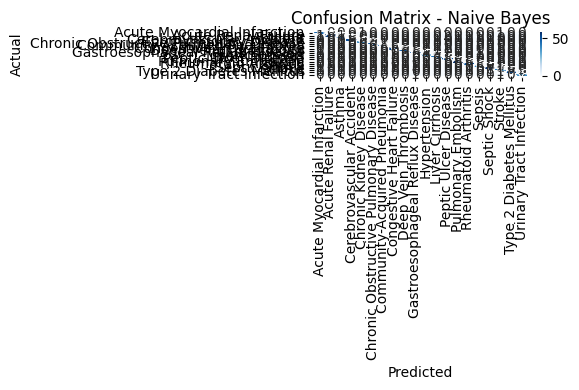

Training SVM...

SVM Accuracy: 0.9460
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.88      0.96      0.92        47
                  Acute Renal Failure       0.98      0.92      0.95        61
                               Asthma       0.89      0.92      0.90        51
             Cerebrovascular Accident       0.98      0.96      0.97        54
               Chronic Kidney Disease       0.97      0.97      0.97        40
Chronic Obstructive Pulmonary Disease       0.96      0.96      0.96        51
         Community-Acquired Pneumonia       0.92      0.96      0.94        46
             Congestive Heart Failure       0.96      0.95      0.96        57
                 Deep Vein Thrombosis       0.98      0.96      0.97        51
      Gastroesophageal Reflux Disease       0.96      0.91      0.93        53
                         Hypertension       0.93      0.90      0.91        41
             

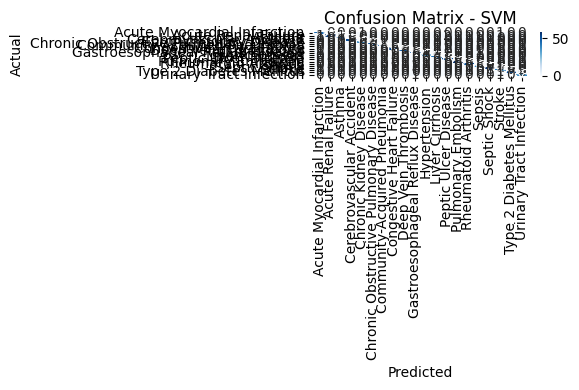


Prediction Results:
Random Forest: Liver Cirrhosis
Logistic Regression: Liver Cirrhosis
Naive Bayes: Liver Cirrhosis
SVM: Deep Vein Thrombosis


In [ ]:
import pandas as pd
import numpy as np
import pickle
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified (1).csv")

# Preprocessing
stopwords_set = set(pd.read_csv('https://raw.githubusercontent.com/Alir3z4/stop-words/master/english.txt', header=None)[0].values)
def clean_text(text):
    text = str(text).lower()
    # Do NOT remove digits
    # text = re.sub(r'\d+', '', text)  ← This line is now commented out
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Allow both letters and numbers
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([word for word in text.split() if word not in stopwords_set])
    return text

data['Clean_Notes'] = data['Clinical Notes'].apply(clean_text)

# Select one sample (e.g., the first row)
sample_index = 0
original_text = data.loc[sample_index, 'Clinical Notes']
cleaned_text = data.loc[sample_index, 'Clean_Notes']

# Display the result
print("=== Original Clinical Note ===")
print(original_text)
print("\n=== After Stopword Removal & Cleaning ===")
print(cleaned_text)

# Encode target labels
label_encoder = LabelEncoder()
data['Diagnosis_Encoded'] = label_encoder.fit_transform(data['Diagnosis'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    data['Clean_Notes'], data['Diagnosis_Encoded'], test_size=0.2, random_state=42)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Save vectorizer and label encoder
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(probability=True, random_state=42)
}

# Train, save, evaluate
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)
    trained_models[name] = model
    with open(f"{name.replace(' ', '_').lower()}_model.pkl", "wb") as f:
        pickle.dump(model, f)

    y_pred = model.predict(X_test_tfidf)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Predict function
with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

model_files = {
    "Random Forest": "random_forest_model.pkl",
    "Logistic Regression": "logistic_regression_model.pkl",
    "Naive Bayes": "naive_bayes_model.pkl",
    "SVM": "svm_model.pkl"
}

loaded_models = {}
for name, file in model_files.items():
    with open(file, "rb") as f:
        loaded_models[name] = pickle.load(f)

def preprocess_for_prediction(text):
    return clean_text(text)

def predict_diagnosis(input_text):
    text = preprocess_for_prediction(input_text)
    vec = vectorizer.transform([text])
    results = {}
    for name, model in loaded_models.items():
        pred = model.predict(vec)[0]
        label = label_encoder.inverse_transform([pred])[0]
        results[name] = label
    return results

# Example prediction
example = "55-year-old male with history of alcohol use, ascites, and jaundice."
preds = predict_diagnosis(example)
print("\nPrediction Results:")
for model, diagnosis in preds.items():
    print(f"{model}: {diagnosis}")


***Deep Learning ***

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



🔧 Training CNN model...
Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 115ms/step - accuracy: 0.5269 - loss: 1.7796 - val_accuracy: 0.9460 - val_loss: 0.4763
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.9465 - loss: 0.4486 - val_accuracy: 0.9460 - val_loss: 0.4967
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.9400 - loss: 0.4627 - val_accuracy: 0.9460 - val_loss: 0.4856
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.9446 - loss: 0.4326 - val_accuracy: 0.9460 - val_loss: 0.4704
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.9459 - loss: 0.3991 - val_accuracy: 0.9460 - val_loss: 0.4716
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.9464 - loss: 0.3758 - val_accuracy: 0.9460 - val_loss: 0.4768
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9409 - loss: 0.4313 - val_accuracy: 0.9460 - val_loss: 0.4854

🔧 Training BiLSTM model...
Epoch 1/15
125/125 ━━━━━━━━━━━

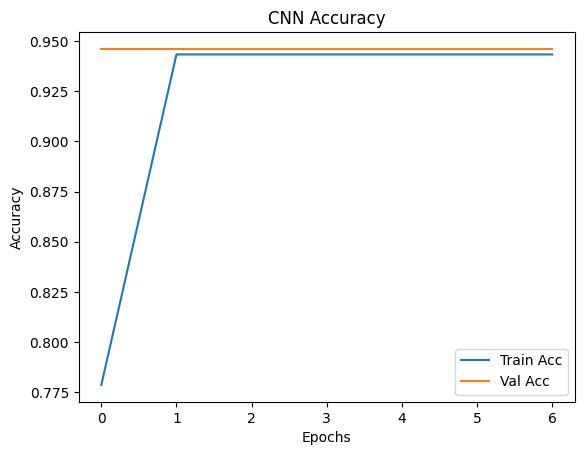

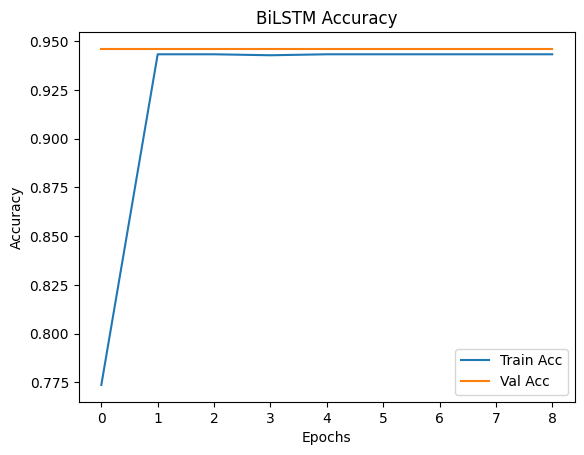

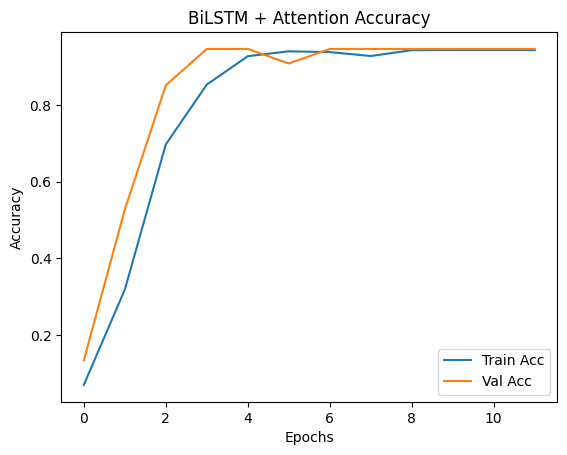

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D, Dense, Input, Layer
import tensorflow.keras.backend as K
import tensorflow as tf

# === 1. Load Dataset ===
data = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified (1).csv")

# === 2. Preprocessing ===
stopwords_set = set(pd.read_csv('https://raw.githubusercontent.com/Alir3z4/stop-words/master/english.txt', header=None)[0].values)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([word for word in text.split() if word not in stopwords_set])
    return text

data['Clean_Notes'] = data['Clinical Notes'].apply(clean_text)

# === 3. Tokenization and Padding ===
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['Clean_Notes'])

sequences = tokenizer.texts_to_sequences(data['Clean_Notes'])
padded_sequences = pad_sequences(sequences, maxlen=200)

# === 4. Encode Labels ===
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['Diagnosis'])
num_classes = len(np.unique(labels))
labels_cat = to_categorical(labels, num_classes=num_classes)

# === 5. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels_cat, test_size=0.2, random_state=42)

from tensorflow.keras.callbacks import EarlyStopping

# === 9. EarlyStopping Callback ===
early_stop = EarlyStopping(
    monitor='val_loss',   # You can also monitor 'val_accuracy'
    patience=3,           # Number of epochs with no improvement before stopping
    restore_best_weights=True
)

# === 6. CNN Model ===
cnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === 7. BiLSTM Model ===
bilstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    Bidirectional(LSTM(64)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === 8. BiLSTM + Attention Model ===
class AttentionLayer(Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def call(self, inputs):
        q = K.tanh(inputs)
        a = K.softmax(q, axis=1)
        return K.sum(a * inputs, axis=1)

input_layer = Input(shape=(200,))
embed = Embedding(input_dim=10000, output_dim=128)(input_layer)
lstm = Bidirectional(LSTM(64, return_sequences=True))(embed)
attn = AttentionLayer()(lstm)

dense1 = Dense(1024, activation='relu')(attn)
dense2 = Dense(512, activation='relu')(dense1)
dense3 = Dense(256, activation='relu')(dense2)
dense4 = Dense(128, activation='relu')(dense3)
dense5 = Dense(64, activation='relu')(dense4)

output = Dense(num_classes, activation='softmax')(dense5)

attention_model = Model(inputs=input_layer, outputs=output)
attention_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === 9. Training ===
print("\n🔧 Training CNN model...")
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32,  callbacks=[early_stop] )

print("\n🔧 Training BiLSTM model...")
bilstm_history = bilstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32,  callbacks=[early_stop] )

print("\n🔧 Training BiLSTM + Attention model...")
attention_history = attention_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32,  callbacks=[early_stop] )

# === 10. Evaluation Function ===
def evaluate_model(model, X, y_true, name):
    y_pred = model.predict(X)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_true, axis=1)
    print(f"\n=== {name} Evaluation ===")
    print(classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_))

evaluate_model(cnn_model, X_test, y_test, "CNN")
evaluate_model(bilstm_model, X_test, y_test, "BiLSTM")
evaluate_model(attention_model, X_test, y_test, "BiLSTM + Attention")

# === 11. Plot Training History ===
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(cnn_history, "CNN")
plot_history(bilstm_history, "BiLSTM")
plot_history(attention_history, "BiLSTM + Attention")



**Transformer Model**

In [ ]:
import pandas as pd
from torch.optim import AdamW
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tqdm import tqdm

# === Load Dataset ===
data = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified (1).csv")

# === Encode Labels ===
label_encoder = LabelEncoder()
data['Diagnosis_Encoded'] = label_encoder.fit_transform(data['Diagnosis'])

train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['Clinical Notes'].tolist(), data['Diagnosis_Encoded'].tolist(), test_size=0.2, random_state=42)

# === Dataset Class ===
class ClinicalDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=256):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_len)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# === Load Models and Tokenizers ===
model1_name = "bert-base-uncased"
model2_name = "emilyalsentzer/Bio_ClinicalBERT"

tokenizer1 = AutoTokenizer.from_pretrained(model1_name)
tokenizer2 = AutoTokenizer.from_pretrained(model2_name)

model1 = AutoModelForSequenceClassification.from_pretrained(model1_name, num_labels=len(label_encoder.classes_))
model2 = AutoModelForSequenceClassification.from_pretrained(model2_name, num_labels=len(label_encoder.classes_))

# === Data Loaders ===
train_dataset1 = ClinicalDataset(train_texts, train_labels, tokenizer1)
test_dataset1 = ClinicalDataset(test_texts, test_labels, tokenizer1)
train_dataset2 = ClinicalDataset(train_texts, train_labels, tokenizer2)
test_dataset2 = ClinicalDataset(test_texts, test_labels, tokenizer2)

train_loader1 = DataLoader(train_dataset1, batch_size=8, shuffle=True)
test_loader1 = DataLoader(test_dataset1, batch_size=8)
train_loader2 = DataLoader(train_dataset2, batch_size=8, shuffle=True)
test_loader2 = DataLoader(test_dataset2, batch_size=8)

# === Training Function ===
def train(model, train_loader, epochs=3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=1e-5)
    model.train()
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}")
        for batch in tqdm(train_loader):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

# === Evaluation Function ===
def evaluate(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# === Predict Single Example ===
def predict(model, tokenizer, text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
    outputs = model(**inputs)
    pred = torch.argmax(outputs.logits, dim=1).item()
    return label_encoder.inverse_transform([pred])[0]

# === Training ===
print("\nTraining BERT-base model...")
train(model1, train_loader1)

print("\nTraining ClinicalBERT model...")
train(model2, train_loader2)

# === Evaluation ===
print("\nEvaluating BERT-base:")
evaluate(model1, test_loader1)

print("\nEvaluating ClinicalBERT:")
evaluate(model2, test_loader2)

# === Prediction Example ===
example_note = "Patient with persistent cough, weight loss and history of smoking."
print("\nExample Prediction")
print("BERT-base:", predict(model1, tokenizer1, example_note))
print("ClinicalBERT:", predict(model2, tokenizer2, example_note))

**LLM**

In [ ]:
# ==================== 1. Install Required Libraries ====================
# Run this only once
# !pip install transformers datasets torch scikit-learn pandas seaborn matplotlib

# ==================== 2. Imports ====================
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# ==================== 3. Load and Preprocess Data ====================
# Load your dataset
df = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified (1).csv")
df = df.dropna(subset=['Clinical Notes', 'Diagnosis'])

# Label encoding
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Diagnosis'])

# Split
X_train, X_test, y_train, y_test = train_test_split(
    df['Clinical Notes'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42)

num_labels = len(set(y_train))

# ==================== 4. Dataset Class ====================
class ClinicalNoteDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=256):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_len)
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# ==================== 5. Metrics Function ====================
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

# ==================== 6. Define Training Function ====================
def train_model(model_name, model_output_dir, train_texts, test_texts, train_labels, test_labels):
    print(f"\n🚀 Training: {model_name}\n")

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

    # Dataset
    train_dataset = ClinicalNoteDataset(train_texts, train_labels, tokenizer)
    test_dataset = ClinicalNoteDataset(test_texts, test_labels, tokenizer)

    # Training arguments
    training_args = TrainingArguments(
        output_dir=model_output_dir,
        eval_strategy="epoch", # Changed from evaluation_strategy
        save_strategy="no",
        num_train_epochs=3,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        logging_dir=f"{model_output_dir}/logs",
        logging_steps=10,
    )

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
    )

    # Train and evaluate
    trainer.train()
    preds_output = trainer.predict(test_dataset)
    preds = np.argmax(preds_output.predictions, axis=1)

    print(f"\n📊 Classification Report for {model_name}:")
    print(classification_report(test_labels, preds, target_names=label_encoder.classes_))
    return model

# ==================== 7. Train BERT-base ====================
bert_model = train_model(
    model_name="bert-base-uncased",
    model_output_dir="./bert_results",
    train_texts=X_train,
    test_texts=X_test,
    train_labels=y_train,
    test_labels=y_test
)

# ==================== 8. Train DistilBERT ====================
distilbert_model = train_model(
    model_name="distilbert-base-uncased",
    model_output_dir="./distilbert_results",
    train_texts=X_train,
    test_texts=X_test,
    train_labels=y_train,
    test_labels=y_test
)

# ==================== 9. Inference Example ====================
def predict_single(text, model, tokenizer, label_encoder):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
    with torch.no_grad():
        output = model(**inputs)
        pred = torch.argmax(output.logits, dim=1).item()
    return label_encoder.inverse_transform([pred])[0]

# Example clinical note
example_text = "55-year-old male with history of alcohol use, ascites, and jaundice."

# Predict using BERT
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_prediction = predict_single(example_text, bert_model, bert_tokenizer, label_encoder)

# Predict using DistilBERT
distil_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
distil_prediction = predict_single(example_text, distilbert_model, distil_tokenizer, label_encoder)

print("\n🧪 Example Inference:")
print(f"BERT Prediction: {bert_prediction}")
print(f"DistilBERT Prediction: {distil_prediction}")


🚀 Training: bert-base-uncased



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

=== Original Clinical Note ===
A 35-year-old male presents with heartburn, regurgitation, and a sour taste in his mouth, especially after meals. The patient has been self-medicating with over-the-counter antacids, but the symptoms persist. A 24-hour pH monitoring test confirms the diagnosis of GERD. The patient is started on a PPI and advised to avoid trigger foods.

=== After Stopword Removal & Cleaning ===
35yearold male heartburn regurgitation sour taste mouth meals patient selfmedicating overthecounter antacids symptoms persist 24hour monitoring confirms diagnosis gerd patient started ppi advised avoid trigger foods


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Generating BERT embeddings...
Training Random Forest...

Random Forest Accuracy: 1.0000
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       1.00      1.00      1.00        51
                  Acute Renal Failure       1.00      1.00      1.00        57
                               Asthma       1.00      1.00      1.00        53
             Cerebrovascular Accident       1.00      1.00      1.00        53
               Chronic Kidney Disease       1.00      1.00      1.00        40
Chronic Obstructive Pulmonary Disease       1.00      1.00      1.00        51
         Community-Acquired Pneumonia       1.00      1.00      1.00        48
             Congestive Heart Failure       1.00      1.00      1.00        56
                 Deep Vein Thrombosis       1.00      1.00      1.00        50
      Gastroesophageal Reflux Disease       1.00      1.00      1.00        50
                         Hypertension     

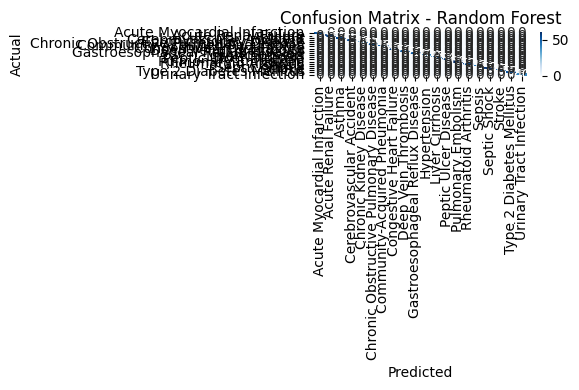

Training Logistic Regression...

Logistic Regression Accuracy: 1.0000
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       1.00      1.00      1.00        51
                  Acute Renal Failure       1.00      1.00      1.00        57
                               Asthma       1.00      1.00      1.00        53
             Cerebrovascular Accident       1.00      1.00      1.00        53
               Chronic Kidney Disease       1.00      1.00      1.00        40
Chronic Obstructive Pulmonary Disease       1.00      1.00      1.00        51
         Community-Acquired Pneumonia       1.00      1.00      1.00        48
             Congestive Heart Failure       1.00      1.00      1.00        56
                 Deep Vein Thrombosis       1.00      1.00      1.00        50
      Gastroesophageal Reflux Disease       1.00      1.00      1.00        50
                         Hypertension       1.00      1.00  

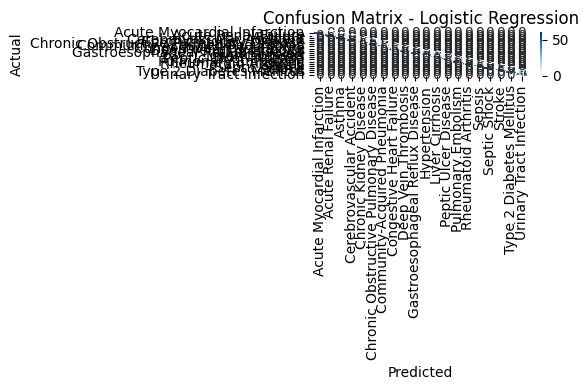

Training Naive Bayes...

Naive Bayes Accuracy: 1.0000
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       1.00      1.00      1.00        51
                  Acute Renal Failure       1.00      1.00      1.00        57
                               Asthma       1.00      1.00      1.00        53
             Cerebrovascular Accident       1.00      1.00      1.00        53
               Chronic Kidney Disease       1.00      1.00      1.00        40
Chronic Obstructive Pulmonary Disease       1.00      1.00      1.00        51
         Community-Acquired Pneumonia       1.00      1.00      1.00        48
             Congestive Heart Failure       1.00      1.00      1.00        56
                 Deep Vein Thrombosis       1.00      1.00      1.00        50
      Gastroesophageal Reflux Disease       1.00      1.00      1.00        50
                         Hypertension       1.00      1.00      1.00        

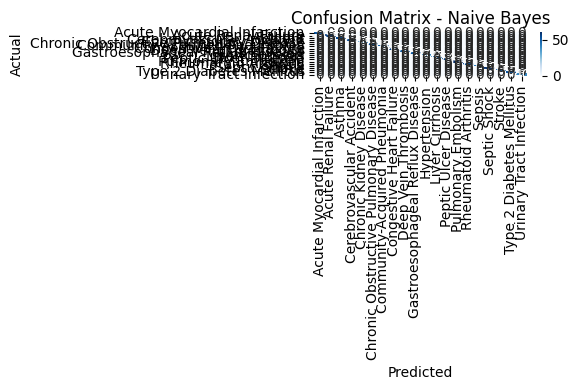

Training SVM...

SVM Accuracy: 1.0000
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       1.00      1.00      1.00        51
                  Acute Renal Failure       1.00      1.00      1.00        57
                               Asthma       1.00      1.00      1.00        53
             Cerebrovascular Accident       1.00      1.00      1.00        53
               Chronic Kidney Disease       1.00      1.00      1.00        40
Chronic Obstructive Pulmonary Disease       1.00      1.00      1.00        51
         Community-Acquired Pneumonia       1.00      1.00      1.00        48
             Congestive Heart Failure       1.00      1.00      1.00        56
                 Deep Vein Thrombosis       1.00      1.00      1.00        50
      Gastroesophageal Reflux Disease       1.00      1.00      1.00        50
                         Hypertension       1.00      1.00      1.00        40
             

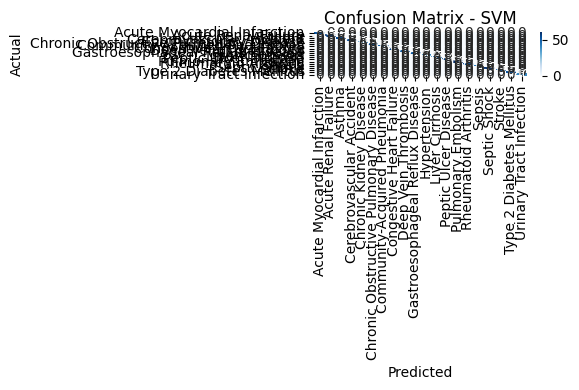


Prediction Results:
Random Forest: Peptic Ulcer Disease
Logistic Regression: Acute Renal Failure
Naive Bayes: Acute Renal Failure
SVM: Acute Renal Failure


In [ ]:
# Clinical Diagnosis Prediction using ClinicalBERT + LabelEncoder + ML models

import pandas as pd
import numpy as np
import pickle
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import AutoTokenizer, AutoModel

# Load dataset
data = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified (1).csv")

# Preprocessing
# tokenization sample
# stopword sample
stopwords_set = set(pd.read_csv('https://raw.githubusercontent.com/Alir3z4/stop-words/master/english.txt', header=None)[0].values)
import re

def clean_text_for_clinicalbert(text):
    text = str(text)
    text = re.sub(r'\s+', ' ', text)  # Normalize excessive whitespace
    return text.strip()

data['Clean_Notes'] = data['Clinical Notes'].apply(clean_text)

# Select one sample (e.g., the first row)
sample_index = 0
original_text = data.loc[sample_index, 'Clinical Notes']
cleaned_text = data.loc[sample_index, 'Clean_Notes']

# Display the result
print("=== Original Clinical Note ===")
print(original_text)
print("\n=== After Stopword Removal & Cleaning ===")
print(cleaned_text)

# Encode target labels
label_encoder = LabelEncoder()
data['Diagnosis_Encoded'] = label_encoder.fit_transform(data['Diagnosis'])

# Train/test split
#0.3 / 0.4 accuracy
#per class record
#balancing dataset    sampling/smote
X_train, X_test, y_train, y_test = train_test_split(
    data['Clean_Notes'], data['Diagnosis_Encoded'], test_size=0.2, random_state=42)

# Load ClinicalBERT
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# Convert text to BERT embeddings (CLS token)
#input and output
def get_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = bert_model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
        embeddings.append(cls_embedding)
    return np.array(embeddings)



print("Generating BERT embeddings...")
X_train_emb = get_bert_embeddings(X_train)
X_test_emb = get_bert_embeddings(X_test)

# Save encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# Define models
#BERT modell/lstm with cnn
#transformer model
#
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42)
}

# Train, save, evaluate
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_emb, y_train)
    trained_models[name] = model
    with open(f"{name.replace(' ', '_').lower()}_model.pkl", "wb") as f:
        pickle.dump(model, f)

    y_pred = model.predict(X_test_emb)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Load encoder and models
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

model_files = {
    "Random Forest": "random_forest_model.pkl",
    "Logistic Regression": "logistic_regression_model.pkl",
    "Naive Bayes": "naive_bayes_model.pkl",
    "SVM": "svm_model.pkl"
}

loaded_models = {}
for name, file in model_files.items():
    with open(file, "rb") as f:
        loaded_models[name] = pickle.load(f)

def predict_diagnosis_with_bert(input_text):
    cleaned = clean_text(input_text)
    inputs = tokenizer(cleaned, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = bert_model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy().reshape(1, -1)
    results = {}
    for name, model in loaded_models.items():
        pred = model.predict(cls_embedding)[0]
        results[name] = label_encoder.inverse_transform([pred])[0]
    return results

# Example prediction
example = "55-year-old male with history of alcohol use, ascites, and jaundice."
preds = predict_diagnosis_with_bert(example)
print("\nPrediction Results:")
for model, diagnosis in preds.items():
    print(f"{model}: {diagnosis}")


    #confusion matrix
   # with number
   #Roc curve



Class distribution BEFORE SMOTE:
Diagnosis
Type 2 Diabetes Mellitus                 285
Peptic Ulcer Disease                     281
Chronic Obstructive Pulmonary Disease    273
Acute Myocardial Infarction              272
Deep Vein Thrombosis                     266
Cerebrovascular Accident                 264
Rheumatoid Arthritis                     251
Acute Renal Failure                      249
Congestive Heart Failure                 248
Septic Shock                             247
Community-Acquired Pneumonia             246
Chronic Kidney Disease                   246
Pulmonary Embolism                       242
Stroke                                   240
Sepsis                                   239
Liver Cirrhosis                          239
Urinary Tract Infection                  235
Asthma                                   232
Hypertension                             229
Gastroesophageal Reflux Disease          216
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]


Generating BERT embeddings for training data...
Generating BERT embeddings for test data...

Original training set size: (4000, 768)
Original training class distribution:
  Acute Myocardial Infarction: 218
  Acute Renal Failure: 199
  Asthma: 186
  Cerebrovascular Accident: 211
  Chronic Kidney Disease: 197
  Chronic Obstructive Pulmonary Disease: 218
  Community-Acquired Pneumonia: 197
  Congestive Heart Failure: 198
  Deep Vein Thrombosis: 213
  Gastroesophageal Reflux Disease: 173
  Hypertension: 183
  Liver Cirrhosis: 191
  Peptic Ulcer Disease: 225
  Pulmonary Embolism: 194
  Rheumatoid Arthritis: 201
  Sepsis: 191
  Septic Shock: 197
  Stroke: 192
  Type 2 Diabetes Mellitus: 228
  Urinary Tract Infection: 188

Applying SMOTE to balance training classes...

Training set size AFTER SMOTE: (4560, 768)
Training class distribution AFTER SMOTE:
  Acute Myocardial Infarction: 228
  Acute Renal Failure: 228
  Asthma: 228
  Cerebrovascular Accident: 228
  Chronic Kidney Disease: 228
  Ch

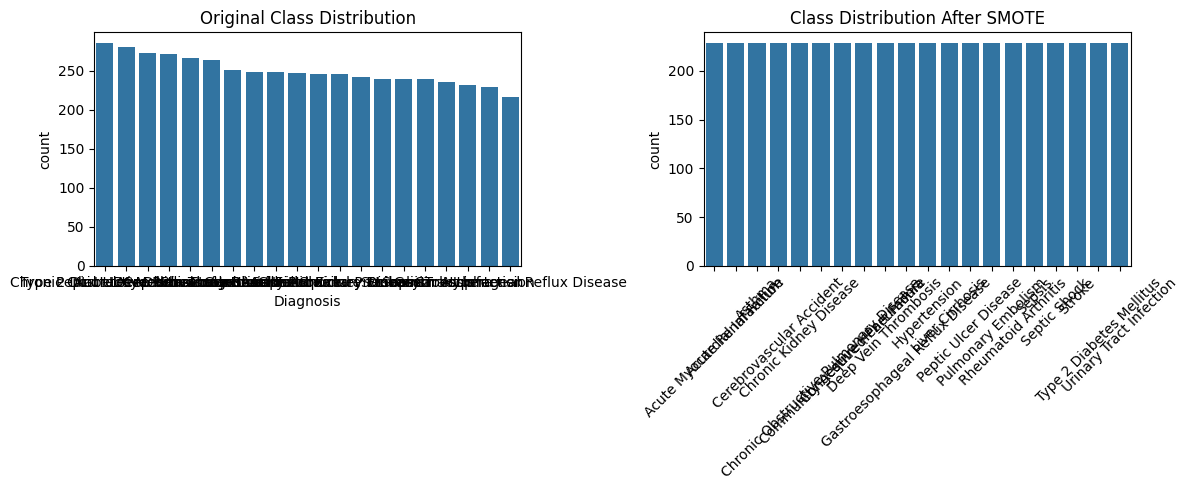


Training Random Forest...
Random Forest Accuracy: 0.9400
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.95      0.98      0.96        54
                  Acute Renal Failure       0.94      0.90      0.92        50
                               Asthma       0.92      0.98      0.95        46
             Cerebrovascular Accident       0.94      0.94      0.94        53
               Chronic Kidney Disease       0.91      1.00      0.95        49
Chronic Obstructive Pulmonary Disease       0.96      0.89      0.92        55
         Community-Acquired Pneumonia       0.92      0.94      0.93        49
             Congestive Heart Failure       0.98      0.94      0.96        50
                 Deep Vein Thrombosis       0.94      0.91      0.92        53
      Gastroesophageal Reflux Disease       0.95      0.91      0.93        43
                         Hypertension       0.94      1.00      0.97    

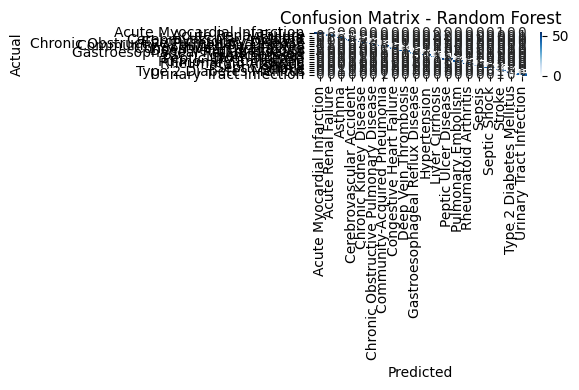


Training Logistic Regression...
Logistic Regression Accuracy: 0.9400
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.95      0.98      0.96        54
                  Acute Renal Failure       0.94      0.90      0.92        50
                               Asthma       0.92      0.98      0.95        46
             Cerebrovascular Accident       0.94      0.94      0.94        53
               Chronic Kidney Disease       0.91      1.00      0.95        49
Chronic Obstructive Pulmonary Disease       0.96      0.89      0.92        55
         Community-Acquired Pneumonia       0.92      0.94      0.93        49
             Congestive Heart Failure       0.98      0.94      0.96        50
                 Deep Vein Thrombosis       0.94      0.91      0.92        53
      Gastroesophageal Reflux Disease       0.95      0.91      0.93        43
                         Hypertension       0.94      1.00  

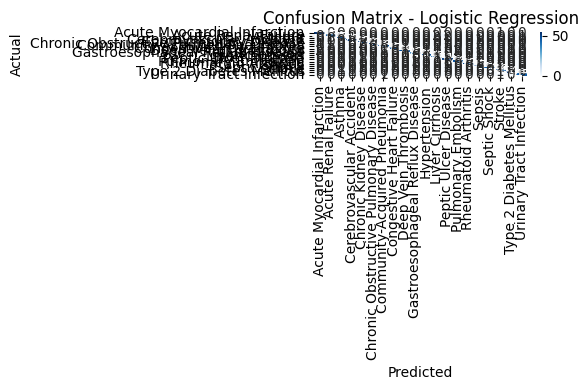


Training Naive Bayes...
Naive Bayes Accuracy: 0.9400
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.95      0.98      0.96        54
                  Acute Renal Failure       0.94      0.90      0.92        50
                               Asthma       0.92      0.98      0.95        46
             Cerebrovascular Accident       0.94      0.94      0.94        53
               Chronic Kidney Disease       0.91      1.00      0.95        49
Chronic Obstructive Pulmonary Disease       0.96      0.89      0.92        55
         Community-Acquired Pneumonia       0.92      0.94      0.93        49
             Congestive Heart Failure       0.98      0.94      0.96        50
                 Deep Vein Thrombosis       0.94      0.91      0.92        53
      Gastroesophageal Reflux Disease       0.95      0.91      0.93        43
                         Hypertension       0.94      1.00      0.97        

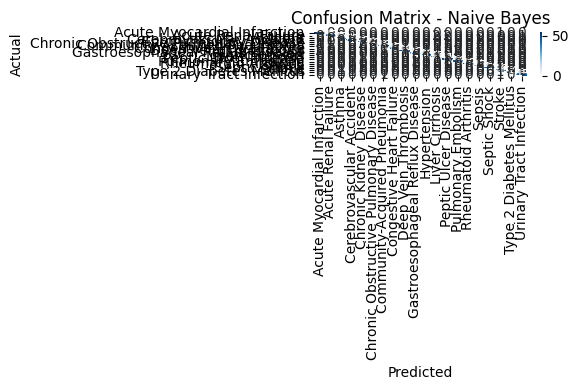


Training SVM...
SVM Accuracy: 0.9400
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.95      0.98      0.96        54
                  Acute Renal Failure       0.94      0.90      0.92        50
                               Asthma       0.92      0.98      0.95        46
             Cerebrovascular Accident       0.94      0.94      0.94        53
               Chronic Kidney Disease       0.91      1.00      0.95        49
Chronic Obstructive Pulmonary Disease       0.96      0.89      0.92        55
         Community-Acquired Pneumonia       0.92      0.94      0.93        49
             Congestive Heart Failure       0.98      0.94      0.96        50
                 Deep Vein Thrombosis       0.94      0.91      0.92        53
      Gastroesophageal Reflux Disease       0.95      0.91      0.93        43
                         Hypertension       0.94      1.00      0.97        46
             

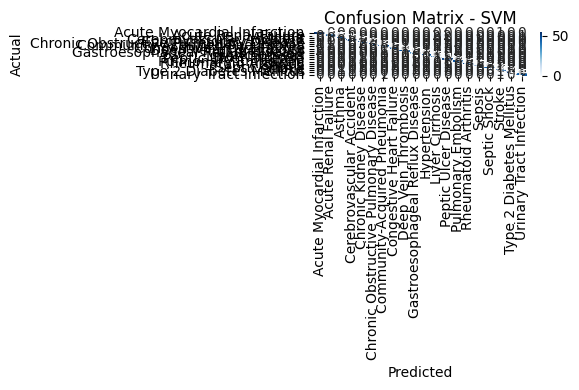

In [ ]:
import pandas as pd
import numpy as np
import re
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load dataset ---
data = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified.csv")

# --- 2. Text cleaning function ---
def clean_text_for_clinicalbert(text):
    text = str(text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

data['Clean_Notes'] = data['Clinical Notes'].apply(clean_text_for_clinicalbert)

# --- 3. Encode target labels ---
label_encoder = LabelEncoder()
data['Diagnosis_Encoded'] = label_encoder.fit_transform(data['Diagnosis'])

print("\nClass distribution BEFORE SMOTE:")
print(data['Diagnosis'].value_counts())

# --- 4. Train-test split ---
X_train_text, X_test_text, y_train, y_test = train_test_split(
    data['Clean_Notes'], data['Diagnosis_Encoded'], test_size=0.2, random_state=42, stratify=data['Diagnosis_Encoded'])

# --- 5. Load ClinicalBERT ---
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# --- 6. Function to get CLS embeddings ---
def get_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = bert_model(**inputs)
        cls_emb = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
        embeddings.append(cls_emb)
    return np.array(embeddings)

print("\nGenerating BERT embeddings for training data...")
X_train_emb = get_bert_embeddings(X_train_text)

print("Generating BERT embeddings for test data...")
X_test_emb = get_bert_embeddings(X_test_text)

print("\nOriginal training set size:", X_train_emb.shape)
print("Original training class distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  {label_encoder.inverse_transform([u])[0]}: {c}")

# --- 7. Apply SMOTE on training embeddings ---
print("\nApplying SMOTE to balance training classes...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_emb, y_train)

print("\nTraining set size AFTER SMOTE:", X_train_balanced.shape)
print("Training class distribution AFTER SMOTE:")
unique, counts = np.unique(y_train_balanced, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  {label_encoder.inverse_transform([u])[0]}: {c}")

# Visualize class balance before and after SMOTE
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x=data['Diagnosis'], order=data['Diagnosis'].value_counts().index)
plt.title("Original Class Distribution")

plt.subplot(1,2,2)
sns.countplot(x=label_encoder.inverse_transform(y_train_balanced), order=label_encoder.classes_)
plt.title("Class Distribution After SMOTE")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 8. Define models ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42)
}

# --- 9. Train, evaluate and visualize ---
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_balanced, y_train_balanced)

    y_pred = model.predict(X_test_emb)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


Final Code

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModel
import warnings
warnings.filterwarnings('ignore')

# ========== Config ==========
MODEL_NAME = "emilyalsentzer/Bio_ClinicalBERT"
MAX_LEN = 128
BATCH_SIZE = 16
EPOCHS = 10
PATIENCE = 3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ========== 1. Load Dataset ==========
df = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified (1).csv")
df = df[['Clinical Notes', 'Diagnosis']].dropna()

# ========== 2. Encode Labels ==========
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Diagnosis'])

# ========== 3. Tokenizer ==========
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize_texts(texts):
    encodings = tokenizer(
        texts,
        truncation=True,
        padding='max_length',
        max_length=MAX_LEN,
        return_tensors='np'
    )
    return encodings['input_ids'], encodings['attention_mask']

# ========== 4. Split ==========
X_train, X_test, y_train, y_test = train_test_split(
    df['Clinical Notes'], df['label'], test_size=0.2, stratify=df['label'], random_state=42)

# ========== 5. Tokenize & Apply SMOTE ==========
print("Before SMOTE:", np.bincount(y_train))

input_ids_train, attn_mask_train = tokenize_texts(X_train.tolist())

X_smote_input = input_ids_train.reshape(len(input_ids_train), -1)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_smote_input, y_train)

print("After SMOTE:", np.bincount(y_resampled))

# Recreate input_ids and attention_mask
input_ids_resampled = X_resampled.reshape(-1, MAX_LEN)
attention_mask_resampled = (input_ids_resampled != tokenizer.pad_token_id).astype(int)

# ========== 6. Dataset Class ==========
class ClinicalDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = torch.tensor(input_ids, dtype=torch.long)
        self.attention_mask = torch.tensor(attention_mask, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'label': self.labels[idx]
        }

train_dataset = ClinicalDataset(input_ids_resampled, attention_mask_resampled, y_resampled)
test_input_ids, test_attention_mask = tokenize_texts(X_test.tolist())
test_dataset = ClinicalDataset(test_input_ids, test_attention_mask, y_test.values)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# ========== 7. Model ==========
class BiLSTMClassifier(nn.Module):
    def __init__(self, bert, hidden_dim, output_dim):
        super(BiLSTMClassifier, self).__init__()
        self.bert = bert
        self.lstm = nn.LSTM(768, hidden_dim, batch_first=True, bidirectional=True)
        self.classifier = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state
        lstm_out, _ = self.lstm(sequence_output)
        final_hidden = lstm_out[:, -1, :]
        return self.classifier(final_hidden)

bert_model = AutoModel.from_pretrained(MODEL_NAME).to(DEVICE)
model = BiLSTMClassifier(bert_model, hidden_dim=128, output_dim=len(label_encoder.classes_)).to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

# ========== 8. Training with EarlyStopping ==========
best_loss = float('inf')
patience_counter = 0

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {avg_loss:.4f}")

    # Early stopping check
    if avg_loss < best_loss:
        best_loss = avg_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== 9. Evaluation ==========
model.load_state_dict(torch.load("best_model.pt"))
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['label'].cpu().numpy()

        outputs = model(input_ids, attention_mask)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()

        y_true.extend(labels)
        y_pred.extend(preds)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Before SMOTE: [218 199 186 211 197 218 197 198 213 173 183 191 225 194 201 191 197 192
 228 188]
After SMOTE: [228 228 228 228 228 228 228 228 228 228 228 228 228 228 228 228 228 228
 228 228]


pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer

# Load Bio_ClinicalBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
MAX_LEN = 128

# Example clinical notes
clinical_notes = [
    "A 35-year-old male presents with heartburn, regurgitation, and a sour taste in his mouth, especially after meals. The patient has been self-medicating with over-the-counter antacids, but the symptoms persist. A 24-hour pH monitoring test confirms the diagnosis of GERD. The patient is started on a PPI and advised to avoid trigger foods."]

# Display before and after tokenization
for i, note in enumerate(clinical_notes, 1):
    print(f"\n🔹 Sample {i} (Original):\n{note}")

    # Tokenize
    encoding = tokenizer(note, padding='max_length', truncation=True, max_length=MAX_LEN, return_tensors='pt')
    tokens = tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])
    input_ids = encoding['input_ids'][0].tolist()
    attention_mask = encoding['attention_mask'][0].tolist()

    print("\n🧬 Tokens:")
    print(tokens[:30])  # Show first 30 tokens

    print("\n🔢 Token IDs:")
    print(input_ids[:30])  # First 30 token IDs

    print("\n🎯 Attention Mask:")
    print(attention_mask[:30])  # First 30 mask values


🔹 Sample 1 (Original):
A 35-year-old male presents with heartburn, regurgitation, and a sour taste in his mouth, especially after meals. The patient has been self-medicating with over-the-counter antacids, but the symptoms persist. A 24-hour pH monitoring test confirms the diagnosis of GERD. The patient is started on a PPI and advised to avoid trigger foods.

🧬 Tokens:
['[CLS]', 'a', '35', '-', 'year', '-', 'old', 'male', 'presents', 'with', 'heart', '##burn', ',', 're', '##gu', '##rg', '##itation', ',', 'and', 'a', 'sour', 'taste', 'in', 'his', 'mouth', ',', 'especially', 'after', 'meals', '.']

🔢 Token IDs:
[101, 170, 2588, 118, 1214, 118, 1385, 2581, 8218, 1114, 1762, 6715, 117, 1231, 13830, 10805, 12633, 117, 1105, 170, 17948, 5080, 1107, 1117, 1779, 117, 2108, 1170, 13077, 119]

🎯 Attention Mask:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 10.4 MB/s eta 0:00:00


Final Model


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

[Baseline] Epoch 1/3 - Loss: 0.8511
[Baseline] Epoch 2/3 - Loss: 0.3856
[Baseline] Epoch 3/3 - Loss: 0.3753

📊 Baseline Performance (Before Aug/SMOTE):
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.98      0.94      0.96        54
                  Acute Renal Failure       0.94      0.90      0.92        50
                               Asthma       0.90      0.94      0.92        47
             Cerebrovascular Accident       0.96      0.94      0.95        53
               Chronic Kidney Disease       0.89      0.96      0.92        49
Chronic Obstructive Pulmonary Disease       1.00      0.91      0.95        55
         Community-Acquired Pneumonia       0.96      0.90      0.93        49
             Congestive Heart Failure       0.94      0.96      0.95        50
                 Deep Vein Thrombosis       0.94      0.96      0.95        53
      Gastroesophageal Reflux Disease       0.91      0.9

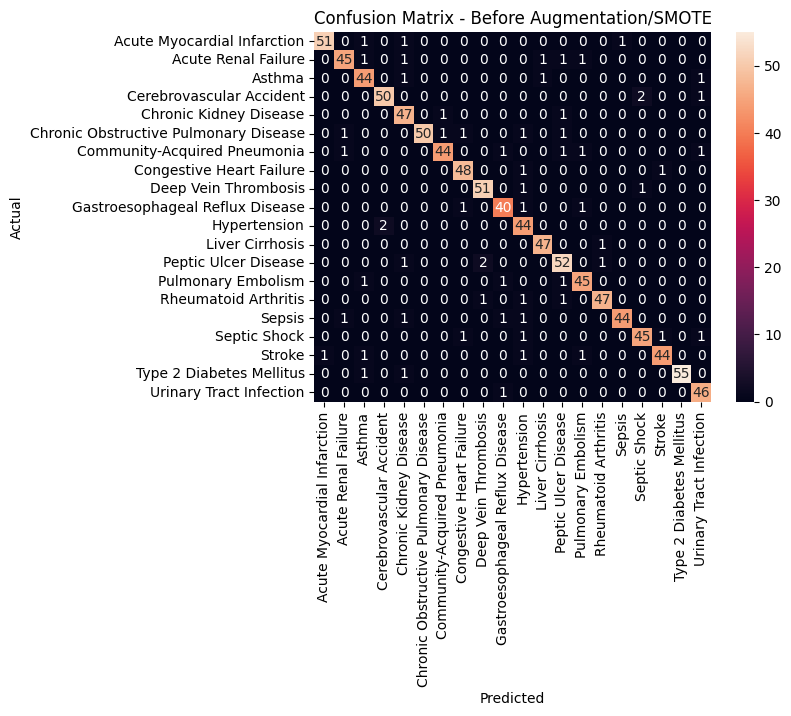

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nlpaug.augmenter.word as naw
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

# ====== Config ======
MODEL_NAME = "emilyalsentzer/Bio_ClinicalBERT"
MAX_LEN = 128
BATCH_SIZE = 8
EPOCHS = 3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ====== 1. Load Dataset ======
df = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified.csv")
df = df[['Clinical Notes', 'Diagnosis']].dropna()

# ====== 2. Encode Labels ======
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Diagnosis'])

# ====== 3. Tokenizer and Model ======
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
bert_model = AutoModel.from_pretrained(MODEL_NAME).to(DEVICE)

# ====== 4. Dataset Class ======
class ClinicalDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=MAX_LEN,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# ====== 5. BiLSTM Classifier ======
class BiLSTMClassifier(nn.Module):
    def __init__(self, bert, hidden_dim, output_dim):
        super(BiLSTMClassifier, self).__init__()
        self.bert = bert
        self.lstm = nn.LSTM(768, hidden_dim, batch_first=True, bidirectional=True)
        self.classifier = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state
        lstm_out, _ = self.lstm(sequence_output)
        final_hidden = lstm_out[:, -1, :]
        return self.classifier(final_hidden)

# ====== 6. Split Data ======
X_train, X_test, y_train, y_test = train_test_split(
    df['Clinical Notes'].tolist(), df['label'].tolist(), test_size=0.2, stratify=df['label'])

# ====== 7. Baseline Training (Before Augmentation/SMOTE) ======
train_dataset = ClinicalDataset(X_train, y_train)
test_dataset = ClinicalDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

num_classes = len(label_encoder.classes_)
model = BiLSTMClassifier(bert_model, hidden_dim=128, output_dim=num_classes).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Baseline] Epoch {epoch+1}/{EPOCHS} - Loss: {total_loss/len(train_loader):.4f}")

# ====== 8. Baseline Evaluation ======
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['label'].cpu().numpy()

        outputs = model(input_ids, attention_mask)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()

        y_true.extend(labels)
        y_pred.extend(preds)

print("\n📊 Baseline Performance (Before Aug/SMOTE):")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Before Augmentation/SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ====== 9. Augmentation ======
aug = naw.SynonymAug(aug_src='wordnet')
def augment_text(text, num_aug=1):
    return [aug.augment(text) for _ in range(num_aug)]

X_aug, y_aug = [], []
for text, label in zip(X_train, y_train):
    X_aug.append(text)
    y_aug.append(label)
    for a in augment_text(text, num_aug=1):
        X_aug.append(a)
        y_aug.append(label)

# ====== 10. Get CLS Embeddings ======
def get_cls_embeddings(texts):
    bert_model.eval()
    embeddings = []
    for text in tqdm(texts, desc="Extracting CLS embeddings"):
        encoding = tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=MAX_LEN).to(DEVICE)
        with torch.no_grad():
            output = bert_model(**encoding)
        cls_emb = output.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
        embeddings.append(cls_emb)
    return np.array(embeddings)

X_aug_embed = get_cls_embeddings(X_aug)
y_aug_np = np.array(y_aug)

# ====== 11. Apply SMOTE ======
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_aug_embed, y_aug_np)

# ====== 12. Train Classifier on SMOTE output ======
clf = LogisticRegression(max_iter=1000)
clf.fit(X_smote, y_smote)

# ====== 13. Test Performance After Aug + SMOTE ======
X_test_embed = get_cls_embeddings(X_test)
y_test_pred = clf.predict(X_test_embed)

print("\n📊 Performance After Augmentation + SMOTE:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - After Augmentation + SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nlpaug.augmenter.word as naw
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

# ====== Config ======
MODEL_NAME = "emilyalsentzer/Bio_ClinicalBERT"
MAX_LEN = 128
BATCH_SIZE = 8
EPOCHS = 3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ====== 1. Load Dataset ======
df = pd.read_csv("/content/clinical_notes_diagnosis_prediction_5000 (1).csv")
df = df[['Clinical Notes', 'Diagnosis']].dropna()

# ====== 2. Encode Labels ======
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Diagnosis'])

# ====== 3. Tokenizer and Model ======
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
bert_model = AutoModel.from_pretrained(MODEL_NAME).to(DEVICE)

# ====== 4. Dataset Class ======
class ClinicalDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=MAX_LEN,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# ====== 5. BiLSTM Classifier ======
class BiLSTMClassifier(nn.Module):
    def __init__(self, bert, hidden_dim, output_dim):
        super(BiLSTMClassifier, self).__init__()
        self.bert = bert
        self.lstm = nn.LSTM(768, hidden_dim, batch_first=True, bidirectional=True)
        self.classifier = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state
        lstm_out, _ = self.lstm(sequence_output)
        final_hidden = lstm_out[:, -1, :]
        return self.classifier(final_hidden)

# ====== 6. Split Data ======
# ====== 6. Split Data ======
from collections import Counter
from sklearn.model_selection import train_test_split

# === 1. Create class-wise split ===
train_texts, test_texts, train_labels, test_labels = [], [], [], []

for label in df['label'].unique():
    class_df = df[df['label'] == label]
    X = class_df['Clinical Notes'].tolist()
    y = class_df['label'].tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_texts.extend(X_train)
    train_labels.extend(y_train)
    test_texts.extend(X_test)
    test_labels.extend(y_test)

# === 2. Show per-class distribution ===
train_counts = Counter(train_labels)
test_counts = Counter(test_labels)

print("🔢 Class distribution in training set:")
for label, count in train_counts.items():
    print(f"{label_encoder.inverse_transform([label])[0]}: {count}")

print("\n🔢 Class distribution in test set:")
for label, count in test_counts.items():
    print(f"{label_encoder.inverse_transform([label])[0]}: {count}")


# ====== 7. Baseline Training (Before Augmentation/SMOTE) ======
train_dataset = ClinicalDataset(X_train, y_train)
test_dataset = ClinicalDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

num_classes = len(label_encoder.classes_)
model = BiLSTMClassifier(bert_model, hidden_dim=128, output_dim=num_classes).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Baseline] Epoch {epoch+1}/{EPOCHS} - Loss: {total_loss/len(train_loader):.4f}")

# ====== 8. Baseline Evaluation ======
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['label'].cpu().numpy()

        outputs = model(input_ids, attention_mask)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()

        y_true.extend(labels)
        y_pred.extend(preds)

print("\n📊 Baseline Performance (Before Aug/SMOTE):")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Before Augmentation/SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ====== 9. Augmentation ======
aug = naw.SynonymAug(aug_src='wordnet')
def augment_text(text, num_aug=1):
    return [aug.augment(text) for _ in range(num_aug)]

X_aug, y_aug = [], []
for text, label in zip(X_train, y_train):
    X_aug.append(text)
    y_aug.append(label)
    for a in augment_text(text, num_aug=1):
        X_aug.append(a)
        y_aug.append(label)

# ====== 10. Get CLS Embeddings ======
def get_cls_embeddings(texts):
    bert_model.eval()
    embeddings = []
    for text in tqdm(texts, desc="Extracting CLS embeddings"):
        encoding = tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=MAX_LEN).to(DEVICE)
        with torch.no_grad():
            output = bert_model(**encoding)
        cls_emb = output.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
        embeddings.append(cls_emb)
    return np.array(embeddings)

X_aug_embed = get_cls_embeddings(X_aug)
y_aug_np = np.array(y_aug)

# ====== 11. Apply SMOTE ======
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_aug_embed, y_aug_np)

# ====== 12. Train Classifier on SMOTE output ======
clf = LogisticRegression(max_iter=1000)
clf.fit(X_smote, y_smote)

# ====== 13. Test Performance After Aug + SMOTE ======
X_test_embed = get_cls_embeddings(X_test)
y_test_pred = clf.predict(X_test_embed)

print("\n📊 Performance After Augmentation + SMOTE:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - After Augmentation + SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

🔢 Class distribution in training set:
Gastroesophageal Reflux Disease: 171
Liver Cirrhosis: 192
Septic Shock: 196
Type 2 Diabetes Mellitus: 226
Community-Acquired Pneumonia: 200
Rheumatoid Arthritis: 196
Chronic Obstructive Pulmonary Disease: 215
Stroke: 192
Acute Myocardial Infarction: 217
Chronic Kidney Disease: 200
Asthma: 188
Congestive Heart Failure: 196
Acute Renal Failure: 191
Peptic Ulcer Disease: 227
Urinary Tract Infection: 191
Cerebrovascular Accident: 210
Sepsis: 192
Pulmonary Embolism: 196
Deep Vein Thrombosis: 208
Hypertension: 188

🔢 Class distribution in test set:
Gastroesophageal Reflux Disease: 43
Liver Cirrhosis: 48
Septic Shock: 50
Type 2 Diabetes Mellitus: 57
Community-Acquired Pneumonia: 51
Rheumatoid Arthritis: 50
Chronic Obstructive Pulmonary Disease: 54
Stroke: 49
Acute Myocardial Infarction: 55
Chronic Kidney Disease: 51
Asthma: 47
Congestive Heart Failure: 49
Acute Renal Failure: 48
Peptic Ulcer Disease: 57
Urinary Tract Infection: 48
Cerebrovascular Accident

ValueError: Number of classes, 1, does not match size of target_names, 20. Try specifying the labels parameter

In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.3 MB/s eta 0:00:00


Final Fiinal model

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Generating BERT embeddings...
Applying SMOTE...

Training Random Forest...
Random Forest Accuracy: 0.9460
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.88      0.96      0.92        47
                  Acute Renal Failure       0.98      0.92      0.95        61
                               Asthma       0.89      0.92      0.90        51
             Cerebrovascular Accident       0.98      0.96      0.97        54
               Chronic Kidney Disease       0.97      0.97      0.97        40
Chronic Obstructive Pulmonary Disease       0.96      0.96      0.96        51
         Community-Acquired Pneumonia       0.92      0.96      0.94        46
             Congestive Heart Failure       0.96      0.95      0.96        57
                 Deep Vein Thrombosis       0.98      0.96      0.97        51
      Gastroesophageal Reflux Disease       0.96      0.91      0.93        53
                        

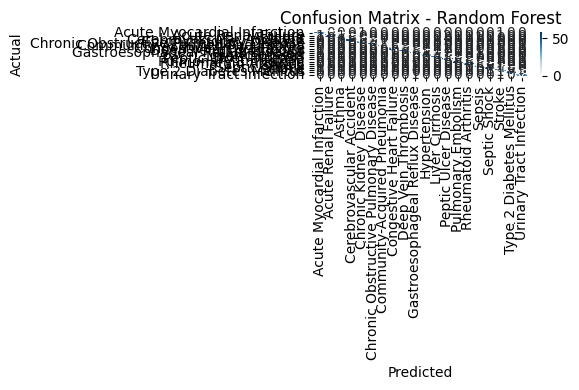


Training Logistic Regression...
Logistic Regression Accuracy: 0.9460
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.88      0.96      0.92        47
                  Acute Renal Failure       0.98      0.92      0.95        61
                               Asthma       0.89      0.92      0.90        51
             Cerebrovascular Accident       0.98      0.96      0.97        54
               Chronic Kidney Disease       0.97      0.97      0.97        40
Chronic Obstructive Pulmonary Disease       0.96      0.96      0.96        51
         Community-Acquired Pneumonia       0.92      0.96      0.94        46
             Congestive Heart Failure       0.96      0.95      0.96        57
                 Deep Vein Thrombosis       0.98      0.96      0.97        51
      Gastroesophageal Reflux Disease       0.96      0.91      0.93        53
                         Hypertension       0.93      0.90  

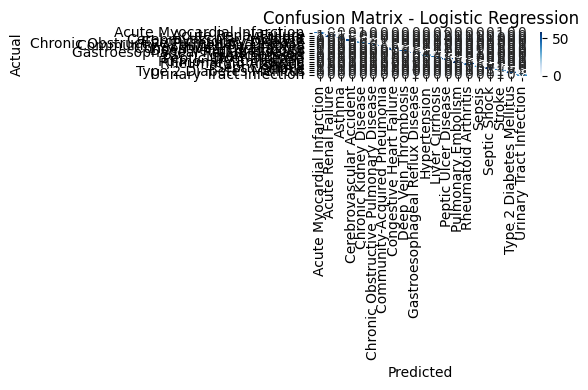


Training Naive Bayes...
Naive Bayes Accuracy: 0.9460
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.88      0.96      0.92        47
                  Acute Renal Failure       0.98      0.92      0.95        61
                               Asthma       0.89      0.92      0.90        51
             Cerebrovascular Accident       0.98      0.96      0.97        54
               Chronic Kidney Disease       0.97      0.97      0.97        40
Chronic Obstructive Pulmonary Disease       0.96      0.96      0.96        51
         Community-Acquired Pneumonia       0.92      0.96      0.94        46
             Congestive Heart Failure       0.96      0.95      0.96        57
                 Deep Vein Thrombosis       0.98      0.96      0.97        51
      Gastroesophageal Reflux Disease       0.96      0.91      0.93        53
                         Hypertension       0.93      0.90      0.91        

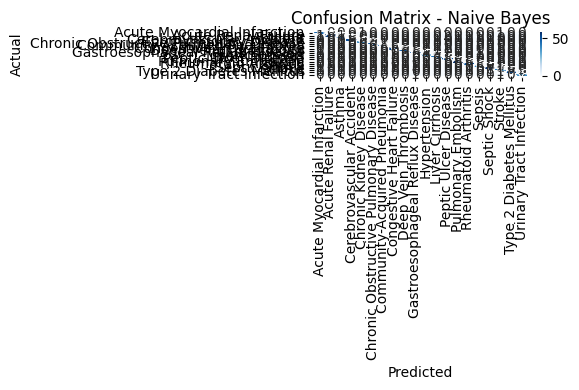


Training SVM...
SVM Accuracy: 0.9460
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       0.88      0.96      0.92        47
                  Acute Renal Failure       0.98      0.92      0.95        61
                               Asthma       0.89      0.92      0.90        51
             Cerebrovascular Accident       0.98      0.96      0.97        54
               Chronic Kidney Disease       0.97      0.97      0.97        40
Chronic Obstructive Pulmonary Disease       0.96      0.96      0.96        51
         Community-Acquired Pneumonia       0.92      0.96      0.94        46
             Congestive Heart Failure       0.96      0.95      0.96        57
                 Deep Vein Thrombosis       0.98      0.96      0.97        51
      Gastroesophageal Reflux Disease       0.96      0.91      0.93        53
                         Hypertension       0.93      0.90      0.91        41
             

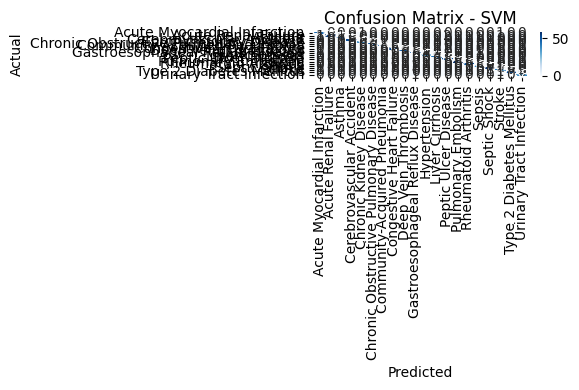


Generating ROC Curves...


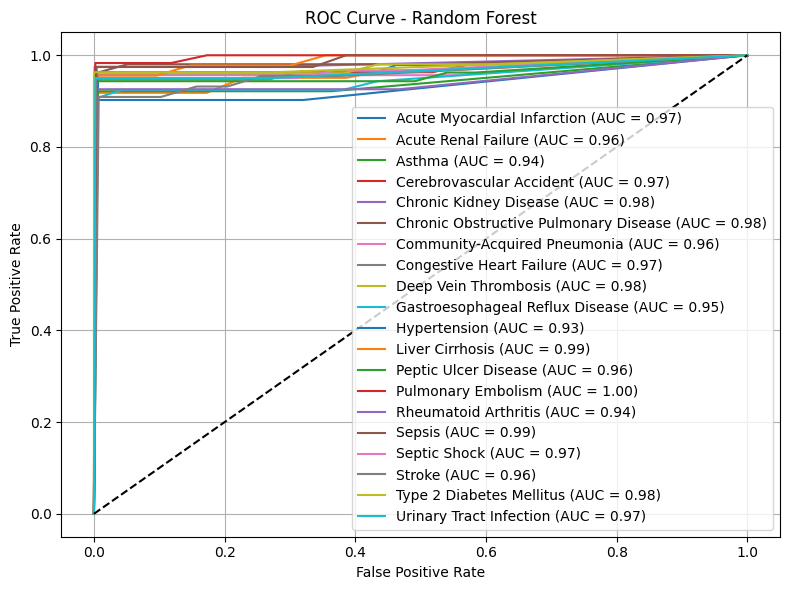

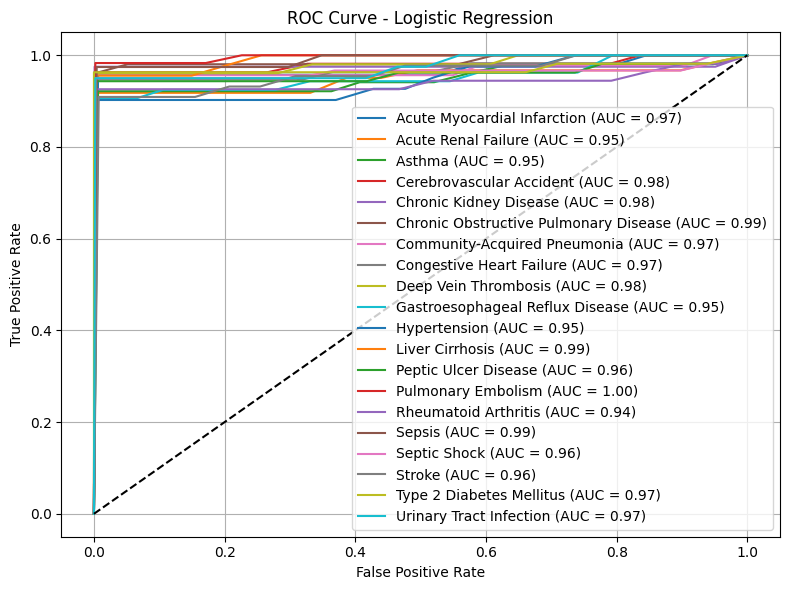

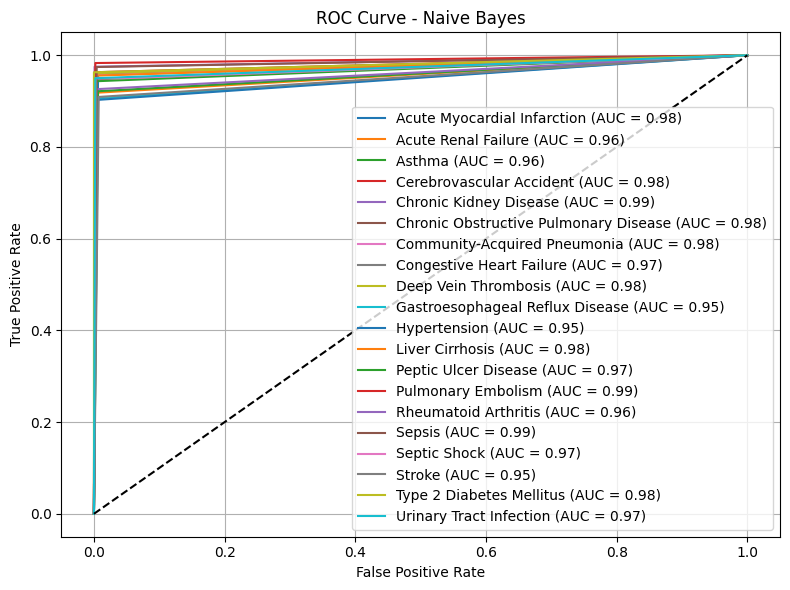

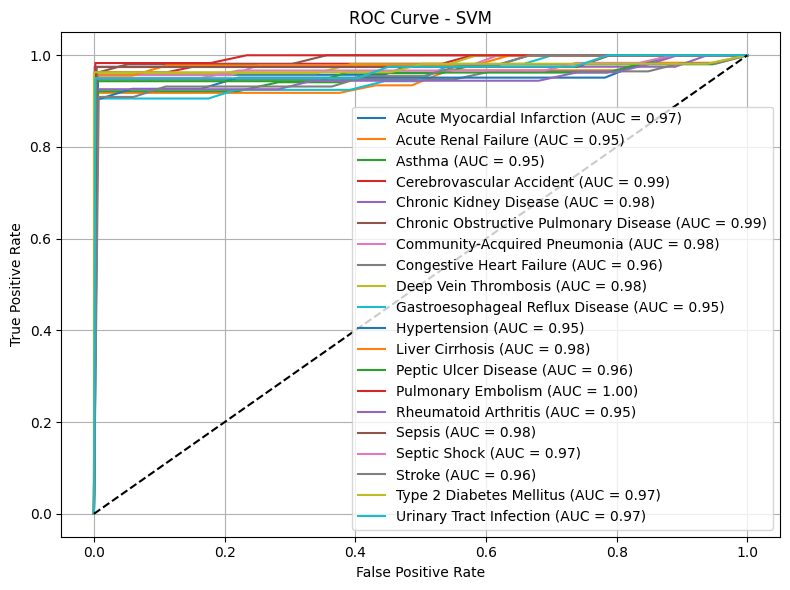


Prediction Results for example note:
Random Forest: Stroke
Logistic Regression: Acute Renal Failure
Naive Bayes: Gastroesophageal Reflux Disease
SVM: Deep Vein Thrombosis


In [ ]:
import pandas as pd
import numpy as np
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from transformers import AutoTokenizer, AutoModel
import warnings
warnings.filterwarnings("ignore")

# ========== Load Dataset ==========
data = pd.read_csv("/content/clinical_notes_diagnosis_prediction_modified (1).csv")

# ========== Preprocessing ==========
def clean_text(text):
    text = str(text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Check missing
print(data['Clinical Notes'].isnull().sum())

# Fill missing with empty string
data['Clinical Notes'] = data['Clinical Notes'].fillna('')

# Then clean
data['Clean_Notes'] = data['Clinical Notes'].apply(clean_text)

# ========== Label Encoding ==========
label_encoder = LabelEncoder()
data['Diagnosis_Encoded'] = label_encoder.fit_transform(data['Diagnosis'])

# ========== Train/Test Split ==========
X_train, X_test, y_train, y_test = train_test_split(
    data['Clean_Notes'], data['Diagnosis_Encoded'], test_size=0.2, random_state=42)

# ========== Load ClinicalBERT ==========
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# ========== BERT Embedding ==========
def get_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = bert_model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
        embeddings.append(cls_embedding)
    return np.array(embeddings)

print("Generating BERT embeddings...")
X_train_emb = get_bert_embeddings(X_train)
X_test_emb = get_bert_embeddings(X_test)

# ========== Apply SMOTE ==========
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_emb_bal, y_train_bal = smote.fit_resample(X_train_emb, y_train)

# ========== Save Label Encoder ==========
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# ========== Define Models ==========
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42)
}

# ========== Train and Evaluate Models ==========
trained_models = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_emb_bal, y_train_bal)
    trained_models[name] = model

    # Save model
    with open(f"{name.replace(' ', '_').lower()}_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # Evaluate
    y_pred = model.predict(X_test_emb)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# ========== Plot ROC Curves ==========
print("\nGenerating ROC Curves...")
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

for name, model in models.items():
    clf = OneVsRestClassifier(model)
    clf.fit(X_train_emb_bal, y_train_bal)
    y_score = clf.predict_proba(X_test_emb)

    plt.figure(figsize=(8, 6))
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ========== Diagnosis Prediction Function ==========
def predict_diagnosis_with_bert(input_text):
    cleaned = clean_text(input_text)
    inputs = tokenizer(cleaned, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = bert_model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy().reshape(1, -1)

    results = {}
    for name, model in trained_models.items():
        pred = model.predict(cls_embedding)[0]
        results[name] = label_encoder.inverse_transform([pred])[0]
    return results

# ========== Example ==========
example = "55-year-old male with history of alcohol use, ascites, and jaundice."
preds = predict_diagnosis_with_bert(example)
print("\nPrediction Results for example note:")
for model, diagnosis in preds.items():
    print(f"{model}: {diagnosis}")
